In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import jax.numpy as np
import jax
import networkx as nx
import matplotlib.pyplot as plt
from src import ComputationalHypergraphDiscovery as CHD
from scipy.integrate import solve_ivp

We consider the example taken from [Modeling with ODE](https://people.tamu.edu/~phoward//m412/modode.pdf). The proposed mechanism for the hydrogenation of ethylene $(\text{C}_2 \text{H}_4)$ to ethane $(\text{C}_2 \text{H}_6)$, is (writing $[H]$ for the concentration of $H$)  modeled by the following system of differential equations:
\begin{split}
\frac{d[H_2]}{dt}&=-k_1[H_2]+k_{-1}[H]^2\\
\frac{d[H]}{dt}&=2k_1[H_2]-2k_{-1}[H]^2-k_2 [C_2H_4][H]-k_3[C_2H_5][H]\\
\frac{d[C_2H_4]}{dt}&=-k_2 [C_2H_4][H]\\
\frac{d[C_2H_5]}{dt}&=k_2 [C_2H_4][H]-k_3[C_2H_5][H]
\end{split}

In [42]:
def F(t, X): #all k = 1
    H_2, H, C2H4, C2H5 = X
    u = - H_2 + H**2
    d = 2*H_2 - 2*H**2 - C2H4*H - C2H5*H 
    t = -C2H4*H
    q = C2H4*H - C2H5*H
    return u, d, t, q


def build_dataset(n_init_cond = 50, t_f = 5, n_times_per_cond = 50):
    l = np.zeros((n_init_cond*n_times_per_cond,8))
    for i in range(n_init_cond):
        key=jax.random.PRNGKey(i)
        sol = solve_ivp(F,(0,t_f), jax.random.uniform(key,shape=(4,)), t_eval = np.linspace(0,t_f,n_times_per_cond))
        derivatives = np.array([F(None, i) for i in sol.y.T])
        l=l.at[i*n_times_per_cond:(i+1)*n_times_per_cond].set(np.hstack([sol.y.T, derivatives]))
    return l



In [43]:
X = np.array(build_dataset())
names=[
    '$H_2$',
    '$H$',
    '$C_2H_4$',
    '$C_2H_5$',
    '$\partial_tH_2$',
    '$\partial_tH$',
    '$\partial_tC_2H_4$',
    '$\partial_tC_2H_5$'
]

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2558961/915193373.py:7: SyntaxWarning: invalid escape sequence '\p'
  '$\partial_tH_2$',
/tmp/ipykernel_2558961/915193373.py:8: SyntaxWarning: invalid escape sequence '\p'
  '$\partial_tH$',
/tmp/ipykernel_2558961/915193373.py:9: SyntaxWarning: invalid escape sequence '\p'
  '$\partial_tC_2H_4$',
/tmp/ipykernel_2558961/915193373.py:10: SyntaxWarning: invalid escape sequence '\p'
  '$\partial_tC_2H_5$'


In [44]:
X_train=X[:int(0.8*len(X))]
X_test=X[int(0.8*len(X)):]

# No prior information

In [73]:

graph_discovery = CHD.GraphDiscovery(X=X_train,names=names,normalize=True)

interpolatory
interpolatory
interpolatory


Finding ancestors with kernel [linear]:  67%|██████▋   | 4/6 [00:03<00:01,  1.83it/s]

non-interpolatory


Finding ancestors with kernel [linear]: 100%|██████████| 6/6 [00:08<00:00,  1.44s/it]



Results for $\partial_tH$
Kernel [linear] has n/(n+s)=3.049975321875315e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=6.087576339825669e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.0015440605418166244, Z=(0.97, 0.98), gamma=1.00e-09
$\partial_tH$ has ancestors with the kernel [linear] | (n/(s+n)=0.00 after pruning)
Ancestors of $\partial_tH$: ['$\\partial_tH_2$', '$\\partial_tC_2H_4$', '$\\partial_tC_2H_5$']



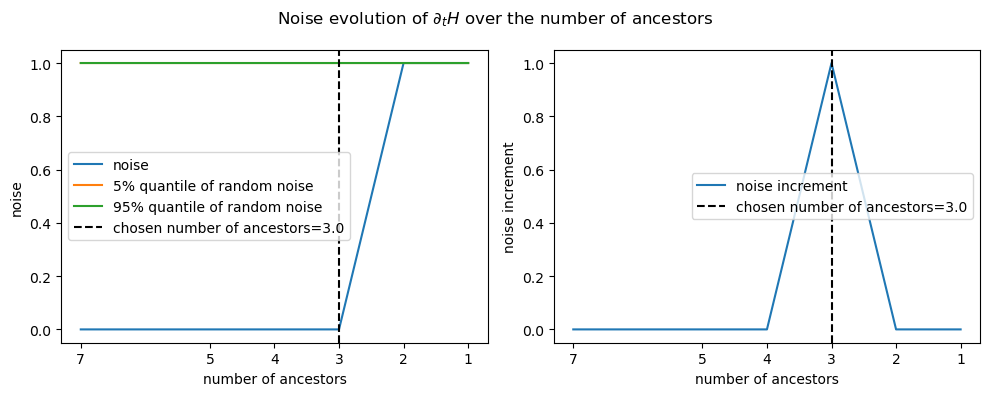


Results for $\partial_tC_2H_4$
Kernel [linear] has n/(n+s)=6.553755615845058e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=9.251431692298123e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.005204586867409058, Z=(0.96, 0.97), gamma=1.00e-09
$\partial_tC_2H_4$ has ancestors with the kernel [linear] | (n/(s+n)=0.00 after pruning)
Ancestors of $\partial_tC_2H_4$: ['$\\partial_tH_2$', '$\\partial_tH$', '$\\partial_tC_2H_5$']



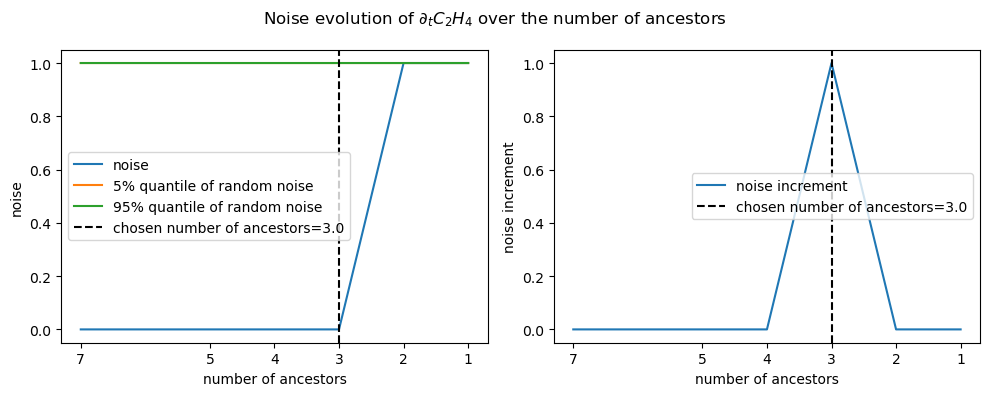

Finding ancestors with kernel [quadratic]:  67%|██████▋   | 4/6 [00:03<00:01,  1.60it/s]

non-interpolatory


Finding ancestors with kernel [quadratic]: 100%|██████████| 6/6 [00:10<00:00,  1.70s/it]



Results for $H_2$
Kernel [linear] has n/(n+s)=0.7184822802061566, Z=(1.00, 1.00), gamma=7.41e+01
Kernel [quadratic] has n/(n+s)=1.506671176977801e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.005077997915581551, Z=(0.97, 0.98), gamma=1.00e-09
$H_2$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00 after pruning)
Ancestors of $H_2$: ['$H$', '$\\partial_tH_2$']



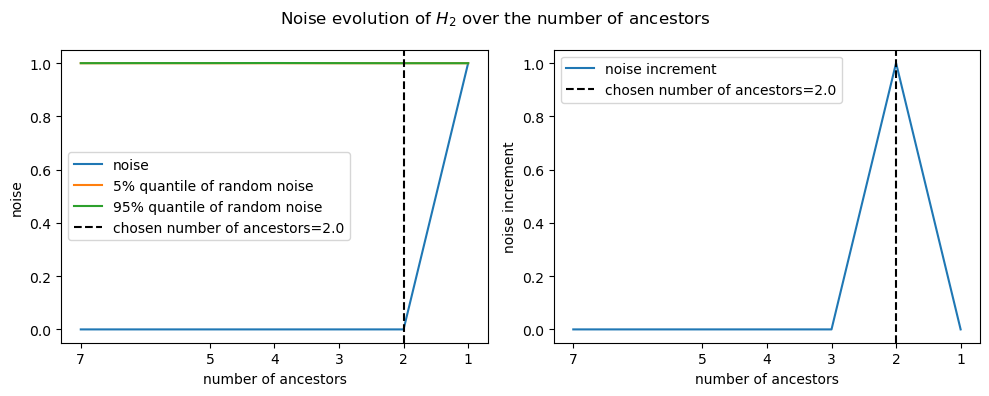


Results for $\partial_tH_2$
Kernel [linear] has n/(n+s)=4.8991902412287294e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=3.878084564276305e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.0029728976831175395, Z=(0.97, 0.98), gamma=1.00e-09
$\partial_tH_2$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00 after pruning)
Ancestors of $\partial_tH_2$: ['$H_2$', '$H$', '$C_2H_4$', '$C_2H_5$', '$\\partial_tH$']



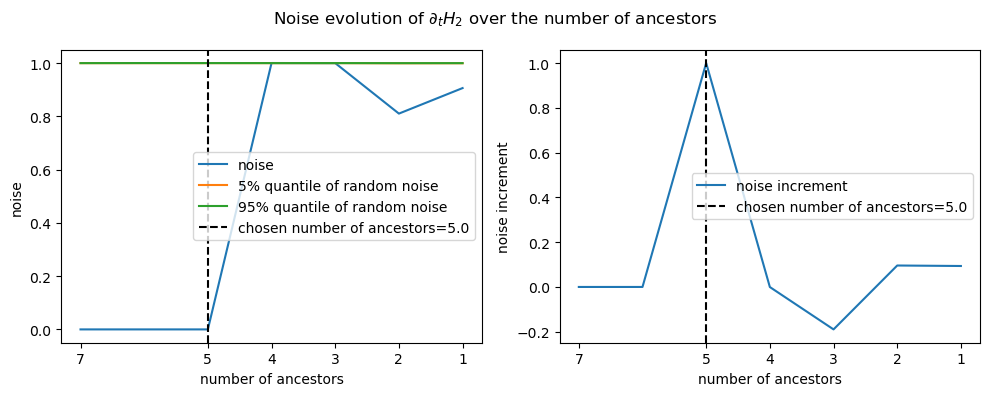


Results for $\partial_tC_2H_5$
Kernel [linear] has n/(n+s)=2.8826593283762813e-11, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=1.0073320836147566e-11, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.004735717291329033, Z=(0.97, 0.98), gamma=1.00e-09
$\partial_tC_2H_5$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00 after pruning)
Ancestors of $\partial_tC_2H_5$: ['$H$', '$C_2H_4$', '$C_2H_5$']



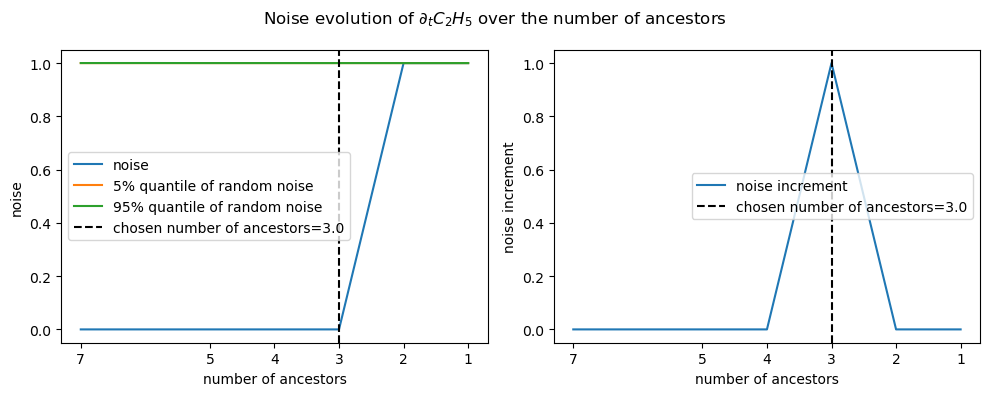

Finding ancestors with kernel [gaussian]:   0%|          | 0/6 [00:00<?, ?it/s]

needs modification for cluster situation


Finding ancestors with kernel [gaussian]:  67%|██████▋   | 4/6 [00:09<00:02,  1.34s/it]

non-interpolatory
needs modification for cluster situation


Finding ancestors with kernel [gaussian]: 100%|██████████| 6/6 [00:22<00:00,  3.77s/it]



Results for $H$
Kernel [linear] has n/(n+s)=0.6606324727821363, Z=(1.00, 1.00), gamma=8.41e+01
Kernel [quadratic] has n/(n+s)=0.5778702309617567, Z=(1.00, 1.00), gamma=1.60e+00
Kernel [gaussian] has n/(n+s)=0.13918915618569097, Z=(0.97, 0.98), gamma=1.00e-09
$H$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.16 after pruning)
Ancestors of $H$: ['$H_2$', '$C_2H_4$', '$C_2H_5$', '$\\partial_tH$', '$\\partial_tC_2H_4$', '$\\partial_tC_2H_5$']



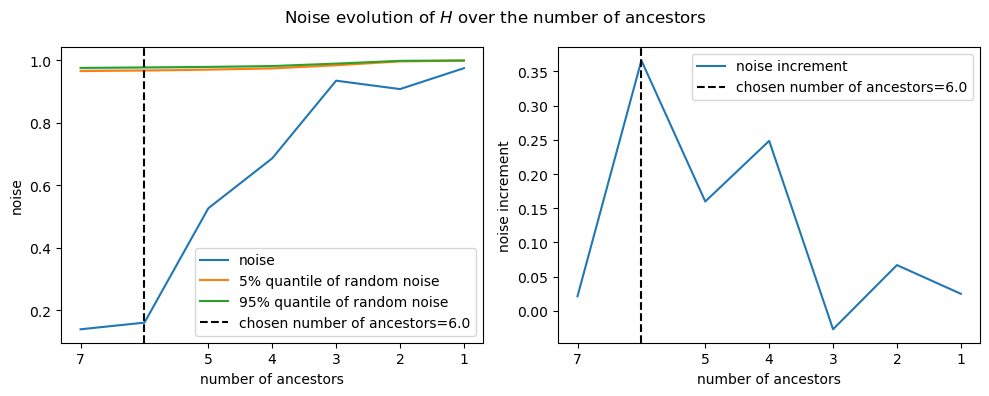


Results for $C_2H_4$
Kernel [linear] has n/(n+s)=0.770699736366329, Z=(1.00, 1.00), gamma=2.86e+02
Kernel [quadratic] has n/(n+s)=0.5819434762912784, Z=(1.00, 1.00), gamma=2.31e+01
Kernel [gaussian] has n/(n+s)=0.3394757396006645, Z=(0.97, 0.98), gamma=1.00e-09
$C_2H_4$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.39 after pruning)
Ancestors of $C_2H_4$: ['$H$', '$C_2H_5$', '$\\partial_tC_2H_4$']



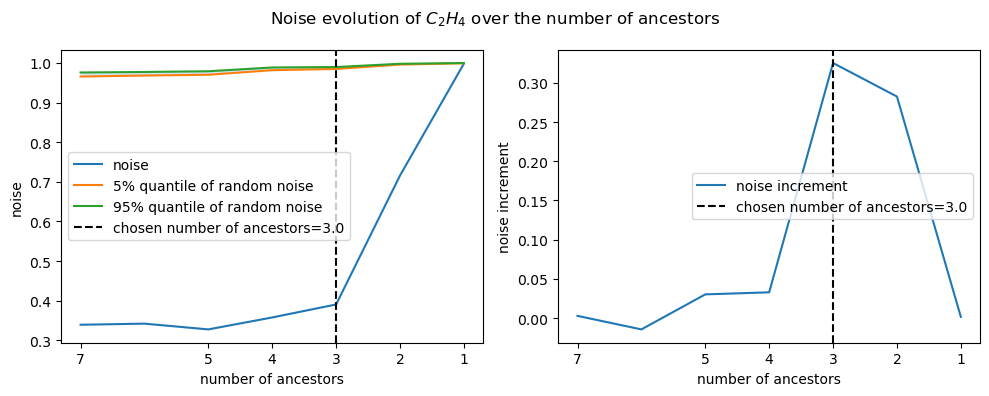


Results for $C_2H_5$
Kernel [linear] has n/(n+s)=0.6885644503255959, Z=(1.00, 1.00), gamma=2.41e+02
Kernel [quadratic] has n/(n+s)=0.501512625727442, Z=(1.00, 1.00), gamma=2.62e+01
Kernel [gaussian] has n/(n+s)=0.39533166513719187, Z=(0.97, 0.98), gamma=1.00e-09
$C_2H_5$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.43 after pruning)
Ancestors of $C_2H_5$: ['$H$', '$C_2H_4$', '$\\partial_tC_2H_5$']



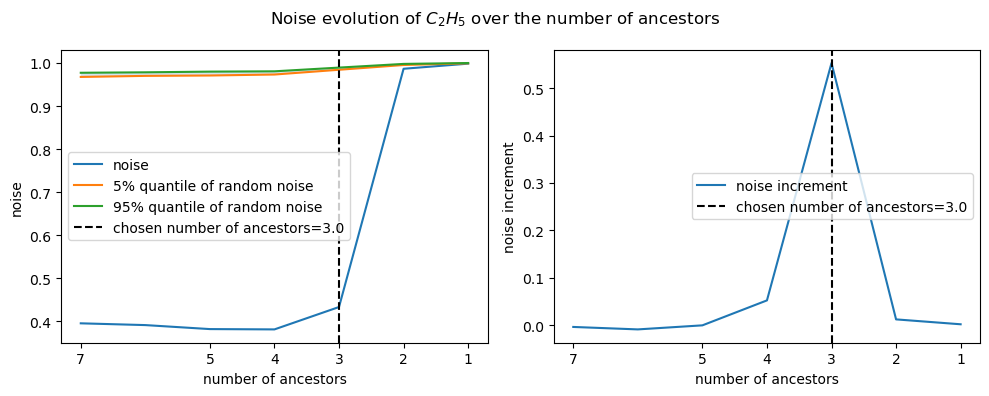

In [74]:

graph_discovery.fit()

In [54]:
not_free_indexes=np.array([graph_discovery.name_to_index[name] for name in not_free])

In [63]:
not_free

['$\\partial_tH_2$',
 '$\\partial_tH$',
 '$\\partial_tC_2H_4$',
 '$\\partial_tC_2H_5$']

In [75]:
pred_from_graph = graph_discovery.predict(not_free,X_test)

In [76]:
np.max(np.abs(X_test[:,not_free_indexes]-pred_from_graph))

Array(6.70963285e-13, dtype=float64)

In [34]:
graph_discovery.G.nodes['$C_2H_5$']

{'kernel_index': 2,
 'type': 'gaussian',
 'gamma': 1.615343559031753e-13,
 'coeff': Array([-2.50726931e+01,  3.69952442e+02, -3.46865824e+03, ...,
        -4.12784319e+06, -4.81511182e+06, -5.38587767e+06], dtype=float64)}

In [37]:
nx.get_node_attributes(graph_discovery.G, 'gamma')['$C_2H_5$']

1.615343559031753e-13

In [25]:
graph_discovery.G.edges[('$H$','$C_2H_5$')]

{'signal': Array(0.45953156, dtype=float64)}

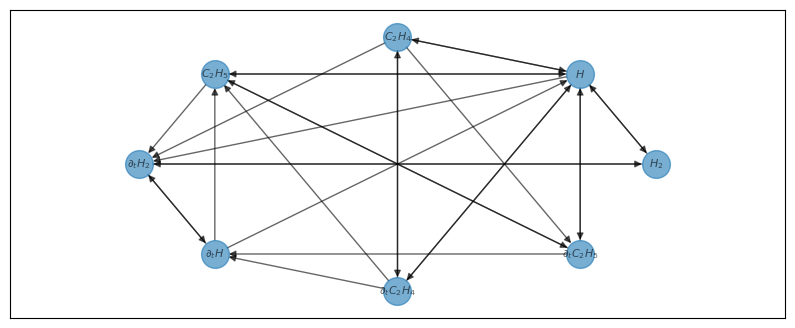

In [9]:
graph_discovery.plot_graph()

In [10]:

def plot_a_network(G,type_label=True):
    pos=nx.kamada_kawai_layout(G, G.nodes())
    nx.draw(G, with_labels=True, pos=pos, node_size=600, font_size=8, alpha=0.6)
    if type_label:
        nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'type'))
    x_values, y_values = zip(*pos.values())
    x_max = max(x_values)
    x_min = min(x_values)
    x_margin = (x_max - x_min) * 0.25
    plt.xlim(x_min - x_margin, x_max + x_margin)

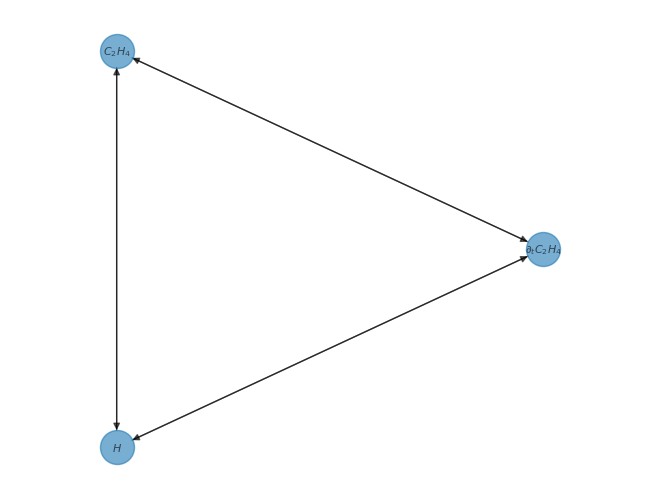

In [11]:
plot_a_network(nx.ego_graph(graph_discovery.G.reverse(),'$C_2H_4$',undirected=False,radius=1).reverse(),type_label=True)

# Using prior information of Bipartite graph

In [39]:
names=[
    '$H_2$',
    '$H$',
    '$C_2H_4$',
    '$C_2H_5$',
    '$\partial_tH_2$',
    '$\partial_tH$',
    '$\partial_tC_2H_4$',
    '$\partial_tC_2H_5$'
]

not_free=[
    '$\partial_tH_2$',
    '$\partial_tH$',
    '$\partial_tC_2H_4$',
    '$\partial_tC_2H_5$'
]
free=[
    '$H_2$',
    '$H$',
    '$C_2H_4$',
    '$C_2H_5$'
]
possible_edges=nx.DiGraph()
for f_node in free:
    for nf_node in not_free:
        possible_edges.add_edge(f_node,nf_node)
        possible_edges.add_edge(nf_node,f_node)

<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2558961/1028034438.py:6: SyntaxWarning: invalid escape sequence '\p'
  '$\partial_tH_2$',
/tmp/ipykernel_2558961/1028034438.py:7: SyntaxWarning: invalid escape sequence '\p'
  '

In [12]:


def acceptation_logic(noise,Z,which):
    if noise<0.5:
        return True
    return False
graph_discovery = CHD.GraphDiscovery(X=X,names=names,possible_edges=possible_edges,normalize=True)
graph_discovery.fit(targets=not_free)

<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2558961/3376806321.py:6: SyntaxWarning: invalid escape sequence '\p'
  '$\partial_tH_2$',
/tmp/ipykernel_2558961/3376806321.py:7: SyntaxWarning: invalid escape sequence '\p'
  '

Converting possible edges to dense adjacency matrix
interpolatory
interpolatory
interpolatory


/tmp/ipykernel_2558961/3376806321.py:6: SyntaxWarning: invalid escape sequence '\p'
  '$\partial_tH_2$',
/tmp/ipykernel_2558961/3376806321.py:7: SyntaxWarning: invalid escape sequence '\p'
  '$\partial_tH$',
/tmp/ipykernel_2558961/3376806321.py:8: SyntaxWarning: invalid escape sequence '\p'
  '$\partial_tC_2H_4$',
/tmp/ipykernel_2558961/3376806321.py:9: SyntaxWarning: invalid escape sequence '\p'
  '$\partial_tC_2H_5$'
/tmp/ipykernel_2558961/3376806321.py:13: SyntaxWarning: invalid escape sequence '\p'
  '$\partial_tH_2$',
/tmp/ipykernel_2558961/3376806321.py:14: SyntaxWarning: invalid escape sequence '\p'
  '$\partial_tH$',
/tmp/ipykernel_2558961/3376806321.py:15: SyntaxWarning: invalid escape sequence '\p'
  '$\partial_tC_2H_4$',
/tmp/ipykernel_2558961/3376806321.py:16: SyntaxWarning: invalid escape sequence '\p'
  '$\partial_tC_2H_5$'


KeyboardInterrupt: 

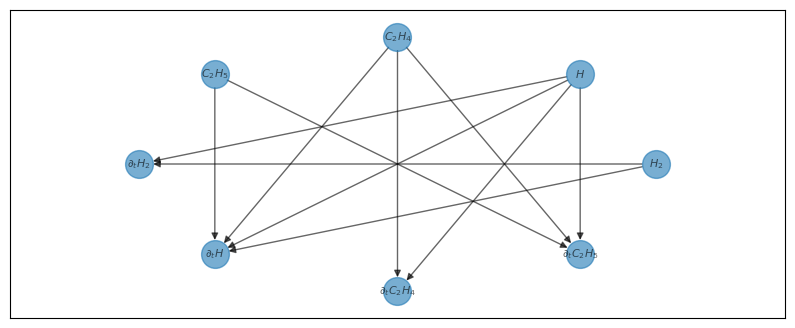

In [ ]:
graph_discovery.plot_graph(False)